In [1]:
import os, shutil

In [5]:
original_dataset_dir = r'D:\Python\Keras. Deep Learning\CHEST X-RAY DATABASE'

base_dir = r'D:\Python\Keras. Deep Learning\chest_xray_dataset_splits'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_pneumonia_dir = os.path.join(train_dir, 'pneumonia')
os.mkdir(train_pneumonia_dir)
train_normal_dir = os.path.join(train_dir, 'normal')
os.mkdir(train_normal_dir)

validation_pneumonia_dir = os.path.join(validation_dir, 'pneumonia')
os.mkdir(validation_pneumonia_dir)
validation_normal_dir = os.path.join(validation_dir, 'normal')
os.mkdir(validation_normal_dir)

test_pneumonia_dir = os.path.join(test_dir, 'pneumonia')
os.mkdir(test_pneumonia_dir)
test_normal_dir = os.path.join(test_dir, 'normal')
os.mkdir(test_normal_dir)

In [7]:
fnames = ['Normal-{}.png'.format(i) for i in range(1, 6001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_normal_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['Normal-{}.png'.format(i) for i in range(6001, 8001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_normal_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['Normal-{}.png'.format(i) for i in range(8001, 10193)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_normal_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['Viral Pneumonia-{}.png'.format(i) for i in range(1, 801)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_pneumonia_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['Viral Pneumonia-{}.png'.format(i) for i in range(801, 1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_pneumonia_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['Viral Pneumonia-{}.png'.format(i) for i in range(1001, 1346)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_pneumonia_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
print('total training normal images: ', len(os.listdir(train_normal_dir)))
print('total validation normal images: ', len(os.listdir(validation_normal_dir)))
print('total test normal images: ', len(os.listdir(test_normal_dir)))
print('total training pneumonia images: ', len(os.listdir(train_pneumonia_dir)))
print('total validation pneumonia images: ', len(os.listdir(validation_pneumonia_dir)))
print('total test pneumonia images: ', len(os.listdir(test_pneumonia_dir)))


total training normal images:  6000
total validation normal images:  2000
total test normal images:  2192
total training pneumonia images:  800
total validation pneumonia images:  200
total test pneumonia images:  345


In [12]:
from keras import layers 
from keras import models
from keras import regularizers

In [34]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001),
                  input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', 
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', 
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', 
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 64)      

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [21]:
from PIL import Image
import os

def is_valid_image(path):
    try:
        Image.open(path).verify()
        return True
    except Exception:
        return False

root_dir = train_dir  
for subdir, dirs, files in os.walk(root_dir):
    for fname in files:
        full = os.path.join(subdir, fname)
        if not is_valid_image(full):
            print('Удаляю битый файл:', full)
            os.remove(full)

root_dir = validation_dir  
for subdir, dirs, files in os.walk(root_dir):
    for fname in files:
        full = os.path.join(subdir, fname)
        if not is_valid_image(full):
            print('Удаляю битый файл:', full)
            os.remove(full)

root_dir = test_dir  
for subdir, dirs, files in os.walk(root_dir):
    for fname in files:
        full = os.path.join(subdir, fname)
        if not is_valid_image(full):
            print('Удаляю битый файл:', full)
            os.remove(full)

In [24]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils.image_utils import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt

In [25]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.9, 1.1],
    brightness_range=[0.8, 1.2],
    channel_shift_range=10.0,
    horizontal_flip=False,
    fill_mode='reflect'
)

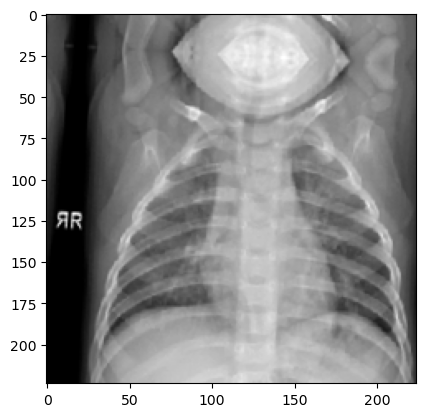

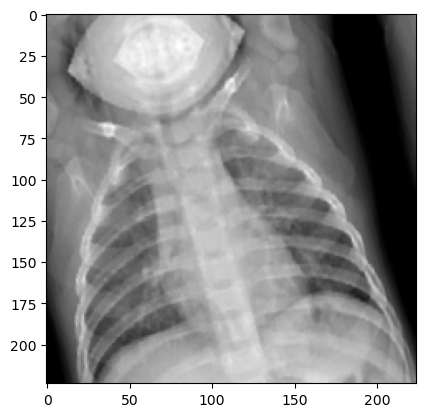

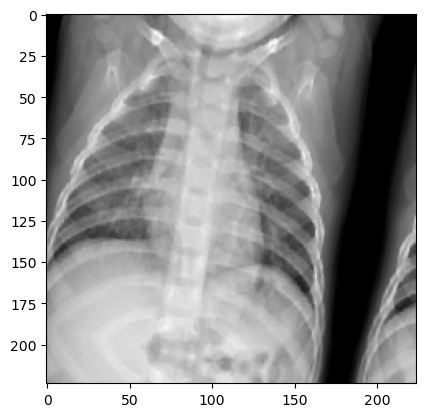

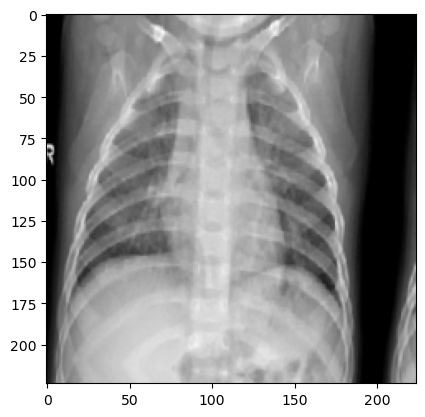

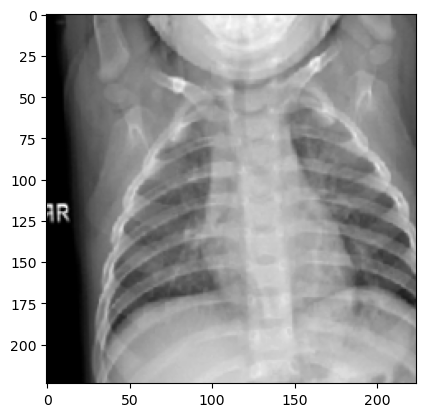

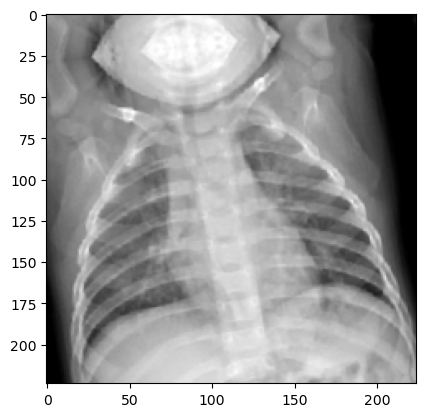

In [28]:
fnames = [os.path.join(train_normal_dir, fname) for
          fname in os.listdir(train_normal_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)

x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break

plt.show()

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary',
    color_mode='grayscale'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary',
    color_mode='grayscale'
)

Found 6800 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.


In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=340,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=110
)

Epoch 1/50
340/340 [==============================] - 150s 440ms/step - loss: 0.5014 - acc: 0.8801 - val_loss: 0.1610 - val_acc: 0.9091
Epoch 2/50
340/340 [==============================] - 149s 438ms/step - loss: 0.2782 - acc: 0.8832 - val_loss: 0.1607 - val_acc: 0.9155
Epoch 3/50
340/340 [==============================] - 150s 441ms/step - loss: 0.2459 - acc: 0.8947 - val_loss: 0.1339 - val_acc: 0.9455
Epoch 4/50
340/340 [==============================] - 149s 438ms/step - loss: 0.2334 - acc: 0.9081 - val_loss: 0.1319 - val_acc: 0.9536
Epoch 5/50
340/340 [==============================] - 150s 440ms/step - loss: 0.2251 - acc: 0.9118 - val_loss: 0.1408 - val_acc: 0.9486
Epoch 6/50
340/340 [==============================] - 148s 436ms/step - loss: 0.2129 - acc: 0.9196 - val_loss: 0.1039 - val_acc: 0.9650
Epoch 7/50
340/340 [==============================] - 150s 442ms/step - loss: 0.2031 - acc: 0.9244 - val_loss: 0.0983 - val_acc: 0.9741
Epoch 8/50
340/340 [============================

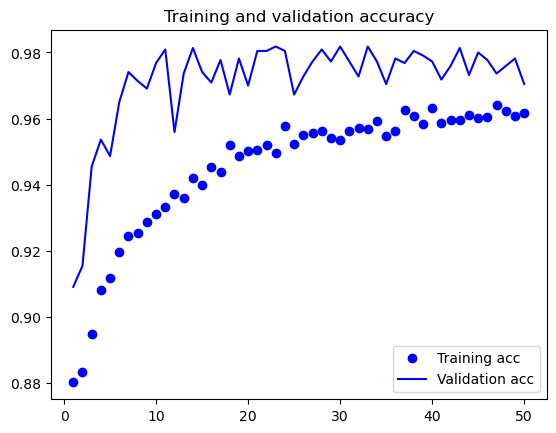

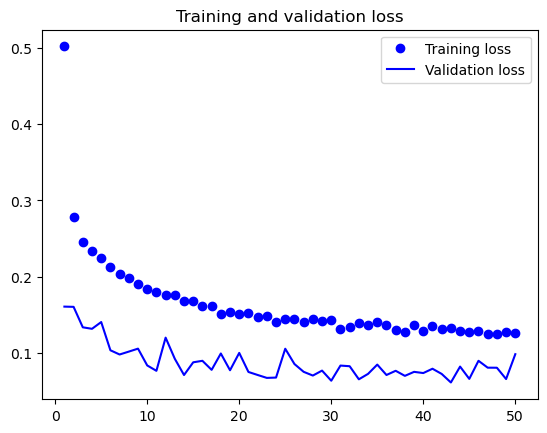

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [38]:
def combined_generator(gen1, gen2):
    while True:
        for x, y in gen1:
            yield x, y
        for x, y in gen2:
            yield x, y

In [43]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [44]:
callbacks_final = [
    EarlyStopping(
        monitor='loss',
        patience=5,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='loss',
        factor=0.5,
        patience=2,
        min_lr=1e-6
    )
]

In [45]:
merged_gen = combined_generator(train_generator, validation_generator)

total_steps = train_generator.samples // train_generator.batch_size \
            + validation_generator.samples // validation_generator.batch_size

history = model.fit(
    merged_gen,
    steps_per_epoch=total_steps,
    epochs=30,
    callbacks=callbacks_final
)

Epoch 1/30
450/450 [==============================] - 194s 432ms/step - loss: 0.1213 - acc: 0.9624 - lr: 0.0010
Epoch 2/30
450/450 [==============================] - 185s 410ms/step - loss: 0.1221 - acc: 0.9618 - lr: 0.0010
Epoch 3/30
450/450 [==============================] - 183s 406ms/step - loss: 0.1216 - acc: 0.9632 - lr: 0.0010
Epoch 4/30
450/450 [==============================] - 182s 404ms/step - loss: 0.1094 - acc: 0.9704 - lr: 5.0000e-04
Epoch 5/30
450/450 [==============================] - 180s 401ms/step - loss: 0.1179 - acc: 0.9652 - lr: 5.0000e-04
Epoch 6/30
450/450 [==============================] - 180s 400ms/step - loss: 0.1099 - acc: 0.9680 - lr: 5.0000e-04
Epoch 7/30
450/450 [==============================] - 180s 400ms/step - loss: 0.1074 - acc: 0.9704 - lr: 2.5000e-04
Epoch 8/30
450/450 [==============================] - 183s 406ms/step - loss: 0.1126 - acc: 0.9673 - lr: 2.5000e-04
Epoch 9/30
450/450 [==============================] - 198s 439ms/step - loss: 0.1076

In [46]:
model.save('ChestXRayDiagnosisModel.h5')

In [47]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=20,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

results = model.evaluate(test_generator, 
                         steps=test_generator.samples//test_generator.batch_size,
                         verbose = 1)

for name, score in zip(model.metrics_names, results):
    print(f"{name}: {score:.4f}")

Found 2537 images belonging to 2 classes.
126/126 [==============================] - 28s 226ms/step - loss: 0.1002 - acc: 0.9611
loss: 0.1002
acc: 0.9611
